# Module 1 Project- Collin Loo and Cary Mosley

In [111]:
#import the modules and read in the data file
import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline
df = pd.read_csv('mergedData.csv')

In [112]:
#cleaning some data/removing a few outliers
df = df.loc[df['Score'] >= 1]
df = df.loc[df['Popularity'] <= 105]
df = df.loc[df['Rating']>0.5]
df['Log Gross']= np.log(df['Gross'])
df_ROI = df.loc[df['Budget'] != 0]
df_ROI['Budget'] = df_ROI['Budget']*1000000
df_ROI['Log Budget']= np.log(df_ROI['Budget'])

df_ROI['ROI']=df_ROI['Gross']/df_ROI['Budget']
df_ROI = df_ROI.loc[df_ROI['ROI']<=10]
df_ROI = df_ROI.loc[df_ROI['ROI']>=.01]


/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

We want to know whether a movies "quality' based on either IMDB rating, metacritic score, or the Movie DB popularity has a strong correlation with the gross revenue for a movie. Surpisingly it doesn't! The correlations we found were all quite low between each of these quality metrics and the movie's gross. We looked at Log of the gross to make sure the correlation wasn't being ruined by outliers and found the same results. We looked at this versus ROI also and found a similar low level of correlation

In [51]:
df['Gross'].describe()

count    3.786000e+03
mean     5.930138e+07
std      7.393818e+07
min      2.699800e+05
25%      1.507120e+07
50%      3.676383e+07
75%      7.447644e+07
max      8.583730e+08
Name: Gross, dtype: float64

0.19717002874753162

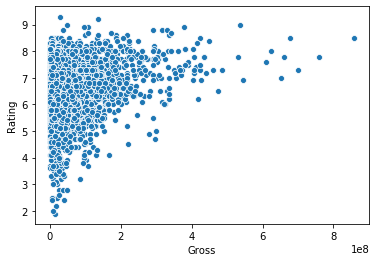

In [52]:
#scatter plot and correlation of IMDB rating and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)
df['Gross'].corr(df['Rating'])

0.07339985687316262

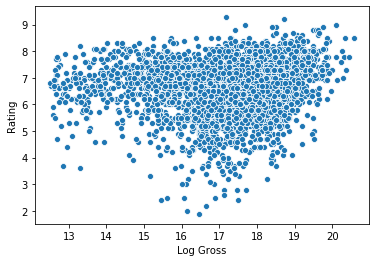

In [53]:
#scatter plot and correlation of IMDB rating and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = df)
df['Log Gross'].corr(df['Rating'])

0.18432223861705496

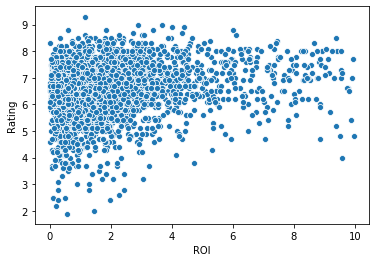

In [54]:
#scatter plot and correlation of IMDB rating and ROI
ax = sns.scatterplot(x = 'ROI',y = 'Rating', data = df_ROI)
df_ROI['ROI'].corr(df_ROI['Rating'])

0.1529301137201682

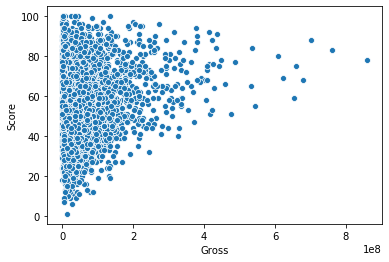

In [55]:
#scatter plot and correlation of metacritic score and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Score', data = df)
df['Gross'].corr(df['Score'])

0.008088372850997859

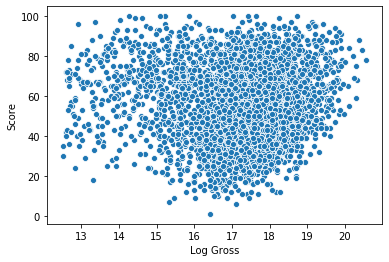

In [56]:
#scatter plot and correlation of metacritic score and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Score', data = df)
df['Log Gross'].corr(df['Score'])

0.19934146088388446

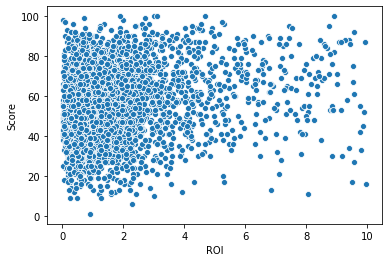

In [57]:
#scatter plot and correlation of metacritic score and ROI
ax = sns.scatterplot(x = 'ROI',y = 'Score', data = df_ROI)
df_ROI['ROI'].corr(df_ROI['Score'])

We found a stronger correlation between Popularity and Gross which makes sense 

0.49440070469515196

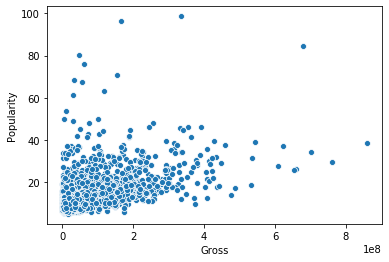

In [58]:
#scatter plot and correlation of the Movie DB popularity and gross revenue
ax = sns.scatterplot(x = 'Gross',y = 'Popularity', data = df)
df['Gross'].corr(df['Popularity'])

0.3709218959682178

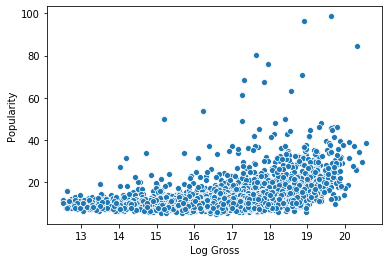

In [59]:
#scatter plot and correlation of the Movie DB popularity and log gross revenue
ax = sns.scatterplot(x = 'Log Gross',y = 'Popularity', data = df)
df['Log Gross'].corr(df['Popularity'])

0.06480325554579171

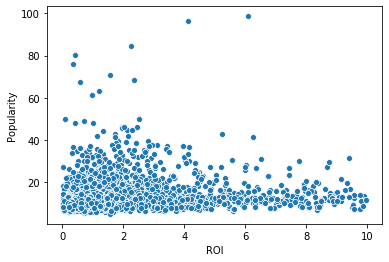

In [60]:
#scatter plot and correlation of the Movie DB popularity and gross revenue
ax = sns.scatterplot(x = 'ROI',y = 'Popularity', data = df_ROI)
df_ROI['ROI'].corr(df_ROI['Popularity'])


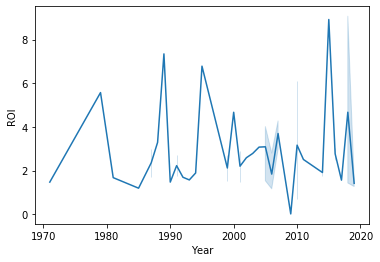

In [61]:
#looking at ROI over time

yvalues = df_ROI['ROI'].groupby(df_ROI['Year']).mean()
sns.lineplot(x = df_ROI['Year'], y = yvalues)

In [113]:
df['Genre'] = df['Genre'].apply(lambda x:x.split())
df['Genre1'] = df['Genre'].apply(lambda x:x[0])


In [114]:
def list_Split(list):
    """Returns the second element in the list if present if not returns the first"""
    try:
        x = list[1]
    except:
        x = list[0]
    return x
def list_Split2(list):
    """Returns the third element in the list if present if not returns the first"""
    try:
        x = list[2]
    except:
        x = list[0]
    return x


In [115]:
df['Genre2'] = df['Genre'].apply(lambda x:list_Split(x))
df['Genre3'] = df['Genre'].apply(lambda x:list_Split2(x))



In [116]:
stars = df['Stars'].str.split(",",n=1,expand = True)
df['Star1'] = stars[0]
df['Star2'] = stars[1]
stars2 = df['Star2'].str.split(",",n=1,expand = True)
df['Star2']=stars2[0]
df['Star3']=stars2[1]
stars3 = df['Star3'].str.split(",",n=1,expand = True)
df['Star3']=stars3[0]
df['Star4']=stars3[1]

In [155]:
df1 = df[['Title','Gross','Star1']].copy()
df2 = df[['Title','Gross','Star2']].copy()
df3 = df[['Title','Gross','Star3']].copy()
df4 = df[['Title','Gross','Star4']].copy()
df1.rename(columns={'Star1':'Star'},inplace = True)
df2.rename(columns={'Star2':'Star'},inplace = True)
df3.rename(columns={'Star3':'Star'},inplace = True)
df4.rename(columns={'Star4':'Star'},inplace = True)

In [156]:
frames = [df1,df2,df3,df4]
stacked_df = pd.concat(frames)

In [161]:
grouped = stacked_df.groupby(stacked_df['Star']).describe()

In [166]:
grouped.columns = grouped.columns.droplevel()

In [168]:
grouped2 = grouped.loc[grouped['count']>1]


In [171]:
grouped2.sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Star,,,,,,,,
Chris Hemsworth,4.0,5.378817e+08,3.028434e+08,155332381.0,3.830875e+08,568910675.0,7.237049e+08,858373000.0
Craig T. Nelson,2.0,4.350114e+08,2.454655e+08,261441092.0,3.482263e+08,435011418.0,5.217966e+08,608581744.0
Danai Gurira,2.0,3.724909e+08,4.632520e+08,44922302.0,2.087066e+08,372490934.0,5.362752e+08,700059566.0
Tom Holland,2.0,3.623666e+08,3.983199e+07,334201140.0,3.482839e+08,362366612.5,3.764493e+08,390532085.0
Chris Pratt,6.0,3.594245e+08,1.818940e+08,105806508.0,2.766147e+08,361494850.5,4.107431e+08,652270625.0
...,...,...,...,...,...,...,...,...
Domhnall Gleeson,2.0,1.224197e+06,7.227395e+05,713143.0,9.686700e+05,1224197.0,1.479724e+06,1735251.0
Sam Riley,2.0,8.082740e+05,9.047856e+04,744296.0,7.762850e+05,808274.0,8.402630e+05,872252.0
Kang-ho Song,3.0,7.960407e+05,6.434936e+05,318574.0,4.301465e+05,541719.0,1.034774e+06,1527829.0


In [109]:
stars_ROI = df_ROI['Stars'].str.split(",",n=1,expand = True)

df_ROI['Star1'] = stars_ROI[0]
df_ROI['Star2'] = stars_ROI[1]

2             Chris Evans, Ana de Armas, Jamie Lee Curtis
4        Thomasin McKenzie, Scarlett Johansson, Taika ...
5                          Omar Sy, Cara Gee, Dan Stevens
6                 George MacKay, Daniel Mays, Colin Firth
7                 Julia Fox, Idina Menzel, Mesfin Lamengo
                              ...                        
3995     Christina Applegate, Christian Clavier, Matt ...
3996     Philip Seymour Hoffman, Philip Bosco, Peter F...
3997     Regina Hall, Romany Malco, Michael Kenneth Wi...
3998            Seth Rogen, Julene Renee, Zabryna Guevara
3999     Geraldine Page, Kristin Griffith, Mary Beth Hurt
Name: Star2, Length: 3786, dtype: object

In [68]:
stars2 = df['Star2'].str.split(",",n=1,expand = True)
stars2_ROI = df_ROI['Star2'].str.split(",",n=1,expand = True)

In [69]:
df['Star2'] = stars2[0]
df_ROI['Star2'] = stars2_ROI[0]

In [71]:
stars = df[['Star1', 'Star2','Gross', 'Log Gross']].groupby('Star1').median().sort_values('Gross', ascending = False)
stars2 = df[['Star1', 'Star2','Gross', 'Log Gross']].groupby('Star2').median().sort_values('Gross', ascending = False)
stars_ROI = df_ROI[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star1').median().sort_values('ROI', ascending = False)
stars2_ROI = df_ROI[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star2').median().sort_values('ROI', ascending = False)




In [72]:
stars.columns

Index(['Gross', 'Log Gross'], dtype='object')

In [73]:
stars2

,Gross,Log Gross
Star2,,
Bryce Dallas Howard,417719760.0,19.850321
Chris Hemsworth,417073931.5,19.598469
Karen Gillan,404540171.0,19.818262
Ellen DeGeneres,380843261.0,19.757898
Orlando Bloom,366368118.5,19.706920
...,...,...
Soma Chhaya,313215.0,12.654645
Jessica Paré,307233.0,12.635362
Riz Ahmed,304616.0,12.626807


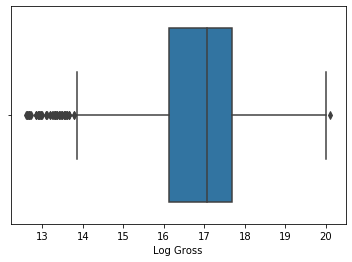

In [74]:
sns.boxplot(stars['Log Gross'])

In [75]:
stars_greater1_ROI = stars_ROI.loc[stars_ROI['ROI']>=1]
stars_greater1_ROI.describe()

,Gross,ROI,Log Gross
count,7.240000e+02,724.000000,724.000000
mean,5.726620e+07,2.619443,17.394934
std,6.515334e+07,1.739175,0.984131
min,4.440980e+05,1.000455,13.003801
25%,2.263323e+07,1.372531,16.901146
50%,4.086134e+07,2.086120,17.499854
75%,6.500514e+07,3.131302,17.968653
max,5.436380e+08,9.968372,20.113794


Text(0.5, 1.0, 'Distribution of ROI by Star')

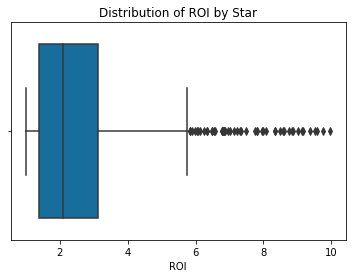

In [76]:
bplot = sns.boxplot(stars_greater1_ROI['ROI'],palette = 'colorblind')
bplot.axes.set_title('Distribution of ROI by Star')

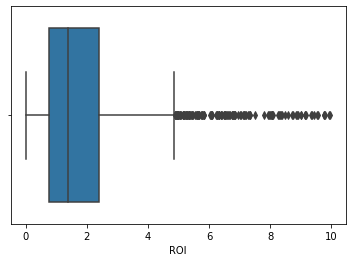

In [77]:
sns.boxplot(stars2_ROI['ROI'])

In [80]:
stars2_greater1_ROI = stars2_ROI.loc[stars2_ROI['ROI']>=1]

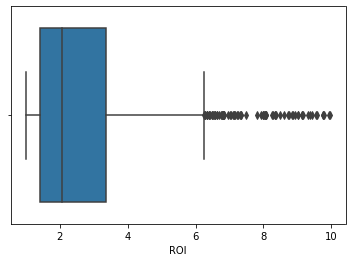

In [81]:
sns.boxplot(stars2_greater1_ROI['ROI'])